### Plotly

Python has a number of additional plotting packages in addition to matplotlib.

Matplotlib is the most common, as it is well supported and well developed, but it is a little lacking in interactivity, and can look a little dated.

To fix this, the company plotly has put together their own package, and released parts of it for open source use.

The main logic of plotly is to allow python, R, julia, Matlab, javascript and other language users to create and share plots across platforms, and online. More or less, we code a graph using our own data and code, and an interactive d3.js graph is made, and optionally shared online.

We can use a public account to share our graphs with everyone, or work locally, or we can pay and keep plots secret unless we want to share. For today, we will work offline for the majority of time - but feel free to use the online version.

Check out their [website here](https://plot.ly/), and the [python specific page here](https://plot.ly/python/).

### Exercise

1. Install plotly, using conda
2. (Optional) Sign up for an account, and enter in the details into the notebook

In [2]:
import plotly
import plotly.plotly as py
from plotly import offline as pyo
#run this once to set you user and pass if working online!
#plotly.tools.set_credentials_file(username='user', api_key='pss')
#this is the plotly.offline version of %matplotlib inline
pyo.init_notebook_mode(connected=True)
#plotly.offline.init_notebook_mode(connected=True)

We can see that plotly has a heavy focus on online and sharing, and also has a new interface, Dash, that allows construction of dashboards.

Much of this would be acheivable by a dedicated developer - the dash is a combination of jinja, flask, matplotlib and d3: But we probably don't want to reinvent the wheel!

We will cover d3.js in a later lesson, as well as the freer interactive plotting package, bokeh. Feel free to make your choice on what to use based on how the plots look, and which library works best for you.

### Basic Plotting with Plotly

Let's recall some matplotlib:

In [3]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

x = np.sort(np.random.normal(size = 1000))

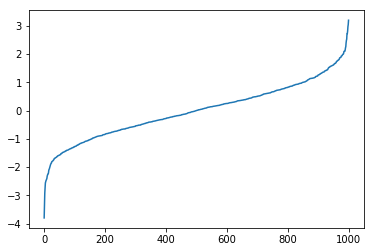

In [4]:
plt.plot(x);

In [6]:
#to make a plotly version
plt.plot(x)
fig = plt.gcf() #get a current reference to the plot
fig = plotly.tools.mpl_to_plotly(fig) #convert from matplotlib to plotly

pyo.iplot(fig, filename='mplexample')
#py.iplot(fig, filename='mplexample') ### requires login

Now we have an 'interactive' plot - we can mouse over and get a tootltip with the values in the plot

We can also click in the 'Edit Chart' in the bottom right, if working online, and open up the interactive editor.

This lets us change the type of plot and edit data, export the html, filter and group the data, as well as carry out some basic statistics.

In general, we probably don't want to do too much here - we are going to go back to the problems with Excel again.

This graph is shared online now! Be careful with your data.

The next thing we can do is to format our tables a little more nicely:

In [7]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
import plotly.figure_factory as ff

table = plotly.figure_factory.create_table(tips.head())
#py.iplot(table, filename='jupyter-table1')
pyo.iplot(table, filename='jupyter-table1')

### Creating plotly graphs

As well as converting matplotlib objects, we can create our own graph objects.

The basic setup is that we create a graph object, or objects, and then call the iplot function on them, to display them in the correct layout.

Lets builf some of the most common types of plots:

In [9]:
import plotly.graph_objs as go

#scatter is used for x and y both varying
#we make a 'dict' with the x and y, using the plot function we want
line_data1 = go.Scatter(y = tips['total_bill'], x = np.arange(len(tips['total_bill'])))
line_data2 = go.Scatter(y = tips['tip'], x = np.arange(len(tips['total_bill'])))

#plot is called on a list of the data objects
pyo.iplot([line_data1, line_data2])

Great, but not super sensible: We probably dont know that the tips vary over time. A scatter plot might be more sensible:

In [10]:
#scatter is used for x and y both varying
#we make a 'dict' with the x and y, using the plot function we want
#mode = 'markers' allows a scatter plot
line_data1 = go.Scatter(x = tips['total_bill'], y = tips['tip'], mode= 'markers')

#plot is called on a list of the data objects
pyo.iplot([line_data1])

What if we want to make different colors per item grouping?

In this case, we can create multiple dicts of data in a list comprehension:

In [11]:
#two dictionaries via list comprehension male and female
data = [{'x':tips['tip'][tips['sex']==sex],\
         'y':tips['total_bill'][tips['sex']==sex],\
         'name':sex,\
        'mode':'markers'} for sex in ['Male', 'Female']]

pyo.iplot(data)

If we want to add some details to our layout, we use a 'layout' dict:

In [12]:
fig = {'data':data, 
       'layout':{'xaxis':{'title':'Tips'}, 
                 'yaxis':{'title':'Total Bill'}, 
                 'title':'Tips'
                }}
pyo.iplot(fig)

We can also add in some more data, if we want to make bubble plots:

In [16]:
data = [{'x':tips['tip'][tips['sex']==sex],\
         'y':tips['total_bill'][tips['sex']==sex],\
         'name':sex,\
         'marker':{'size':tips['size'][tips['sex']==sex]*5},\
        'mode':'markers'} for sex in ['Male', 'Female']]

fig = {'data':data, 
       'layout':{'xaxis':{'title':'Tips'}, 
                 'yaxis':{'title':'Total Bill'}, 
                 'title':'Tips'
                }}

pyo.iplot(fig)

Using different functions from the `go` module, we can plot different types of data.

Other charts are `Bar`, `Histogram` and `Box`:

In [14]:
###do some aggregation!
data = tips.groupby('size').mean().reset_index()

#we can plot from here!
data = go.Bar(x = data['size'], y = data['tip'])
pyo.iplot([data])

In [17]:
data = go.Histogram(x = tips.tip)
pyo.iplot([data])

In [18]:
data = [go.Box(y = tips['tip'][tips['sex']==sex], name = sex) for sex in ['Male', 'Female']]
pyo.iplot(data)

### Subplotting

Subplotting is based on matplotlibs objects: We define a subplot, and add out data into it:

In [34]:
plt1 = go.Box(y = tips['tip'][tips['sex']=='Male'])

data = tips.groupby('size').mean().reset_index()
plt2 = go.Bar(x = data['size'], y = data['tip'])

plt3 = go.Scatter(x = tips['total_bill'], y = tips['tip'], mode= 'markers')
plt4 = go.Histogram(x = tips.tip)

fig = plotly.tools.make_subplots(rows = 2, cols = 2, subplot_titles=('Plot1', 'Plot 2', 'Plot 3', 'Plot4'))

#fig = plotly.tools.make_subplots(rows = 2,cols = 2)
fig.append_trace(plt1, 1,1)
fig.append_trace(plt2, 1,2)
fig.append_trace(plt3, 2,1)
fig.append_trace(plt4, 2,2)

fig['layout']['xaxis1'].update(title='X axis 1')
fig['layout']['xaxis2'].update(title='X axis 2')
fig['layout']['xaxis3'].update(title='X axis 3')
fig['layout']['xaxis4'].update(title='X axis 4')

fig['layout'].update(showlegend=False, title = 'All four plots!')
pyo.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



We can of course use the same arguments as above to modify titles, colors and so on

### Exercise

1. Use the plotly help to add titles and x and y axis labels to each subplot, and to change the color of the outputs to be all blue.

2. Install the R plotly library, load it, and create a a graph, using the command:

```
p <- plot_ly(data = iris, x = ~Sepal.Length, y = ~Petal.Length)
p
```

### Chloropleths

Choropleth is a fancy name for a map, colored by region.

Let's map global mango production on a plotly map. [Here is some data](https://drive.google.com/file/d/1Z3a40PViLThUkY5YQrysHYwepd3unlTg/view?usp=sharing) taken from the [FAO's data portal](http://www.fao.org/faostat/en/#search/Mangoes%2C%20mangosteens%2C%20guavas).

We need to give a 'z' coordinate, and that is about it:

In [23]:
import pandas as pd

df = pd.read_csv('data/mangoes.csv')

data = [dict(
        type = 'choropleth',
        locations = df['Area'],
        ##needed to match countries!
        locationmode = 'country names',
        z = df['Value'])]

fig = dict( data=data)
pyo.iplot( fig, validate=False, filename='d3-world-map')

### Interactive Plots

Plotly has some fun interactive widgets, but the code is a little complex. `Dash` is plotlys dashboard software, and has better integration.

We will make a slider to show mango production, based on a cutoff, at which it is put as 0.

For now we will use the basic version - we create a list of data for each value of our desired slider, and set it to have the visible attribute as `True`, which we will toggle.


In [25]:
df = pd.read_csv('data/mangoes.csv')

#lets log our values
df['logvalue'] = np.log(df['Value'])

#here is the range to include
ranges=[tuple([x, x+1]) for x in range(17)]

#a list comprehension, to bin the ranges - each member in the data dict is invisible, and containts the relevant data
data = [dict(
        #set invisible
        visible = False,
        type = 'choropleth',
        locations = df['Area'][df['logvalue']>i[0]],
        ##needed to match countries!
        locationmode = 'country names',
        z = df['Value'][df['logvalue']>i[0]]) for i in ranges]

Now that we have our data nicely binned, we can add in some steps. This allows us to have a display at each step point:

In [26]:
steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',
        ###we want all lower ones to be visible
        args = ['visible', [False] * (len(data))],
    )
    step['args'][1][i] = True
    steps.append(step)
steps[1]

{'method': 'restyle',
 'args': ['visible',
  [False,
   True,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False]]}

So at each step, we have set all lower values to be visible! We have a dict at each step, with `args:visible` set to be a list of 17 booleans, to determine whether the data is visible or not.

Phew, let's try to add this to a slider:

In [27]:
sliders = [dict(
    active = 16,
    currentvalue = {"prefix": "Log Area Min to include: "},
    pad = {"t": 50},
    steps = steps
)]

And plot:

In [29]:
layout = dict(sliders=sliders)

fig = dict(data=data, layout=layout)

pyo.iplot(fig, filename='Mango Slider')

Nice! An interactive, zoomable, plot.

### Exercise

1. Make a geo bubble plot for the earthquake data we got from USGS back in the SQL lessons: [here](https://drive.google.com/open?id=129ojIry8ptpl8bpthDRWjL2hokatU5TR). Make the marker size increase with quake magnitude.

2. Advanced: Make it interactive, to have a cutoff for scale

3. Advanced 2: Add a time cutoff to the slider, to allow the quakes to be filtered by time.